### <div align='center'>Data Exploration</div>

----
Before diving into the approach that seems intuitive, lets take a look at the shape and form of the data a bit.

In [1]:
import findspark
findspark.init()
import pyspark

APP_NAME = 'Exploration-Notebook'
sc = pyspark.SparkContext()
spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()


In [2]:
from utils import *
import datetime

In [3]:
ds = df_to_rdd(spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri",
"mongodb://localhost/crymeclarity.incidents_test").load())
# lets only look at data from a single day

### Location

In [4]:
# now take just the location data
dl = ds.map(lambda x: x['location_1']['coordinates'])
coords = dl.collect()
coords = [a for a in coords if a[0] <= -20]
x = [a[0] for a in coords]
y = [a[1] for a in coords] 

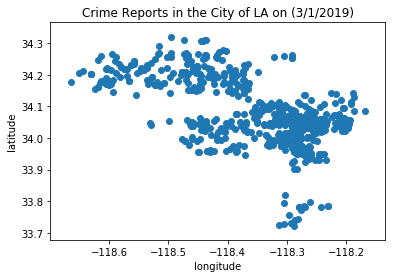

In [11]:
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Crime Reports in the City of LA on (3/1/2019)')
plt.show()

### Time Occurance of incidents

In [6]:
import numpy as np
# Function to plot a histogram using pyplot
def create_hist(rdd_histogram_data):
    """Given an RDD.histogram, plot a pyplot histogram"""
    heights = np.array(rdd_histogram_data[1])
    full_bins = rdd_histogram_data[0]
    mid_point_bins = full_bins[:-1]
    widths = [abs(i - j) for i, j in zip(full_bins[:-1], full_bins[1:])]
    bar = plt.bar(mid_point_bins, heights, width=widths, color='b')
    return bar

<BarContainer object of 20 artists>

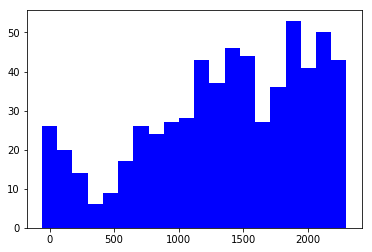

In [7]:
create_hist(ds.map(lambda x: float(x['time_occ'])).histogram(20))

### Age of Victims

<BarContainer object of 20 artists>

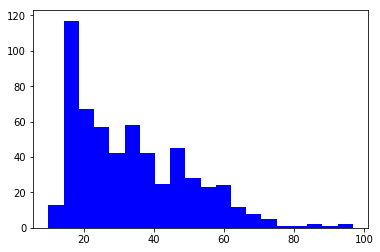

In [8]:
def valid_float(x):
    try:
        float(x)
        return True
    except:
        return False
ds_va = ds.filter(lambda x: valid_float(x['vict_age']))
create_hist(ds_va.map(lambda x: float(x['vict_age'])).histogram(20))

### Incidents by Area

In [9]:
g_ds = ds.groupBy(lambda x: x["area_name"])
g_ds = g_ds.map(lambda x: {"area_name": x[0], "n_incidents": len(x[1])})
g_ds.collect()
sorted(g_ds.collect(), key=lambda x: x['n_incidents'], reverse=True)

[{'area_name': '77th Street', 'n_incidents': 41},
 {'area_name': 'Olympic', 'n_incidents': 38},
 {'area_name': 'Pacific', 'n_incidents': 37},
 {'area_name': 'West LA', 'n_incidents': 36},
 {'area_name': 'N Hollywood', 'n_incidents': 35},
 {'area_name': 'Topanga', 'n_incidents': 34},
 {'area_name': 'Hollenbeck', 'n_incidents': 33},
 {'area_name': 'Van Nuys', 'n_incidents': 32},
 {'area_name': 'Hollywood', 'n_incidents': 30},
 {'area_name': 'Southeast', 'n_incidents': 30},
 {'area_name': 'Mission', 'n_incidents': 30},
 {'area_name': 'Southwest', 'n_incidents': 28},
 {'area_name': 'Newton', 'n_incidents': 27},
 {'area_name': 'Devonshire', 'n_incidents': 27},
 {'area_name': 'West Valley', 'n_incidents': 25},
 {'area_name': 'Northeast', 'n_incidents': 24},
 {'area_name': 'Central', 'n_incidents': 23},
 {'area_name': 'Wilshire', 'n_incidents': 23},
 {'area_name': 'Rampart', 'n_incidents': 22},
 {'area_name': 'Foothill', 'n_incidents': 22},
 {'area_name': 'Harbor', 'n_incidents': 20}]

### Incidents by Crime-Type

In [10]:
g_ds = ds.groupBy(lambda x: x["crm_cd_desc"])
g_ds = g_ds.map(lambda x: {"crm_cd_desc": x[0], "n_incidents": len(x[1])})
g_ds.collect()
sorted(g_ds.collect(), key=lambda x: x['n_incidents'], reverse=True)

[{'crm_cd_desc': 'BURGLARY FROM VEHICLE', 'n_incidents': 50},
 {'crm_cd_desc': 'BURGLARY', 'n_incidents': 49},
 {'crm_cd_desc': 'THEFT PLAIN - PETTY ($950 & UNDER)', 'n_incidents': 46},
 {'crm_cd_desc': 'BATTERY - SIMPLE ASSAULT', 'n_incidents': 46},
 {'crm_cd_desc': 'VEHICLE - STOLEN', 'n_incidents': 44},
 {'crm_cd_desc': 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
  'n_incidents': 36},
 {'crm_cd_desc': 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
  'n_incidents': 35},
 {'crm_cd_desc': 'ROBBERY', 'n_incidents': 27},
 {'crm_cd_desc': 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
  'n_incidents': 26},
 {'crm_cd_desc': 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'n_incidents': 25},
 {'crm_cd_desc': 'THEFT OF IDENTITY', 'n_incidents': 25},
 {'crm_cd_desc': 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
  'n_incidents': 22},
 {'crm_cd_desc': 'INTIMATE PARTNER - SIMPLE ASSAULT', 'n_incidents': 22},
 {'crm_cd_desc': 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PRO